In [139]:
#calculate dpa through SRIM simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 


0       5.001
1      10.001
2      15.001
3      20.001
4      25.001
       ...   
95    480.001
96    485.001
97    490.001
98    495.001
99    500.001
Name: depth, Length: 100, dtype: float64
      depth      V_Ni        V1        V2       dpa
0     5.001  0.061045  0.373530  0.993758  0.302293
1    10.001  0.064756  0.500043  1.340790  0.403299
2    15.001  0.066107  0.581600  1.588960  0.473369
3    20.001  0.069250  0.621905  1.703720  0.506852
4    25.001  0.071056  0.662624  1.816780  0.539780
..      ...       ...       ...       ...       ...
95  480.001  0.000000  0.000228  0.000768  0.000211
96  485.001  0.000000  0.000192  0.000619  0.000172
97  490.001  0.000000  0.000057  0.000135  0.000041
98  495.001  0.000000  0.000071  0.000121  0.000041
99  500.001  0.000000  0.000107  0.000213  0.000068

[100 rows x 5 columns]
0     0.302293
2     0.473369
4     0.539780
6     0.611059
8     0.641994
10    0.725842
12    0.770817
14    0.805314
16    0.825819
18    0.838632
20    0

/usr/lib/python3/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


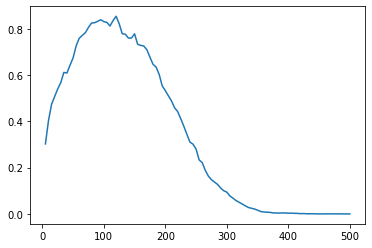

In [85]:
#full cascade
path='/home/heruhe/Desktop/Ga2o3/combine_cells/SRIM/SRIM_DATA/full_cascade_beta_ga2o3_ni_400kev_2101'
fn=path+'/VACANCY.txt'
# Read the CSV file with specified parameters
df = pd.read_csv(fn, skiprows=29, nrows=100, sep='  ', names=['depth','V_Ni' ,'V1', 'V2'],header=None)

# Assuming 'df' is your DataFrame
for column in df.columns:
    # Replace commas with dots as decimal separator
    df[column] = df[column].str.replace(',', '.')
    
    # Convert to numeric
    df[column] = pd.to_numeric(df[column], errors='coerce')
df['depth']=df['depth']/10
print(df['depth'])
flunce=2*10**14
#flunce=1*10**15
atom_density=9.45*10**22
df['dpa']=(df['V_Ni']+df['V1']+df['V2'])*flunce/atom_density*10**8
plt.plot(df['depth'],df['dpa'])
print(df)
# Extract every two rows to obtain srim dpa
srim_dpa = df.iloc[::2].iloc[:40]['dpa']
print(srim_dpa)

In [39]:
#quick  calculation
path='/home/heruhe/Desktop/Ga2o3/combine_cells/SRIM/SRIM_DATA/quick_cascade-beta-ga2o3-Ni-400kev-3000'

fn=path+'/VACANCY.txt'
# Read the CSV file with specified parameters
df = pd.read_csv(fn, skiprows=27, nrows=100, sep='  ', names=['depth','V1', 'V2'],header=None)

# Assuming 'df' is your DataFrame
for column in df.columns:
    # Replace commas with dots as decimal separator
    df[column] = df[column].str.replace(',', '.')
    
    # Convert to numeric
    df[column] = pd.to_numeric(df[column], errors='coerce')

#print(df['V2'])
df['depth']=df['depth']/100
flunce=1*10**15
atom_density=9.45*10**22
df['dpa']=(df['V1']+df['V2'])*flunce/atom_density*10**8
#plt.plot(df['depth'],df['dpa'])


/usr/lib/python3/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [40]:

#function to calculate displacements-per-atom (dpa)
def DPA(E,npka,estop,n,TDE):
    #input E:recoil energy
    #npka:cascade times
    #estop:electronic stopping power,obtained by lammps logfile output stable 'f_elstop'
    #n:number of atoms
    #TDE: lattice dis-placement energy
    #output: dpa value
    Td=E-estop
    return npka*0.8*Td/(2*TDE*n)
TDEO1=17.44
TDEO2=17.38
TDEO3=17.07
TDEGa1=22.91
TDEGa2=20.04
mO=15.9994
mGa=69.72
TDEga2o3=((TDEO1+TDEO2+TDEO3)*mO+(TDEGa1+TDEGa2)*mGa)/(2*mGa+3*mO)
print((TDEGa1+TDEGa2)/2,(TDEO1+TDEO2+TDEO3)/3)

21.475 17.296666666666667


In [92]:
DPA(1500,10,193.294,81920,TDEga2o3)
srim_dpa

0     0.302293
2     0.473369
4     0.539780
6     0.611059
8     0.641994
10    0.725842
12    0.770817
14    0.805314
16    0.825819
18    0.838632
20    0.826866
22    0.834870
24    0.820786
26    0.776077
28    0.759578
30    0.732599
32    0.725073
34    0.676910
36    0.633991
38    0.552558
40    0.510005
42    0.458955
44    0.411724
46    0.344467
48    0.301225
50    0.233242
52    0.188311
54    0.147792
56    0.127505
58    0.100129
60    0.077739
62    0.057590
64    0.042805
66    0.027955
68    0.021172
70    0.010521
72    0.007474
74    0.004456
76    0.003721
78    0.004043
Name: dpa, dtype: float64

In [132]:

pkal=[]
for i in range(40):
    dpa=srim_dpa.iloc[i]
    #print(dpa)
    for pka in range(0,3001,10):
        pka_dpa=DPA(1500,pka,193.294,81920,TDEga2o3)
        delt=np.abs(pka_dpa-dpa)
        #print(pka,delt)
        if delt<=0.002:
            #print(dpa,c_dpa,pka)
            pkal.append(pka)
            break
    
print(pkal)


[970, 1510, 1720, 1950, 2050, 2320, 2460, 2570, 2640, 2680, 2640, 2670, 2620, 2480, 2430, 2340, 2320, 2160, 2030, 1770, 1630, 1470, 1320, 1100, 960, 740, 600, 470, 410, 320, 250, 180, 140, 90, 70, 30, 20, 10, 10, 10]


In [130]:
#check repeat value

from collections import Counter

my_list = pkal
# Count occurrences of each value
counts = Counter(my_list)

# Find repeated values and their counts
repeat_values = {value: count for value, count in counts.items() if count > 1}

print("Repeated values and their counts:")
for value, count in repeat_values.items():
    print(f"{value}: {count} times")



Repeated values and their counts:
2320: 2 times
2640: 2 times
10: 3 times


In [ ]:
for i in 10.20.30.70.90.140.180.250.320.410.470.600.740.960.970.1100.1320.1470.1510.1630.1720.1770.1950.2030.2050.2160.2320.2340.2430.2460.2480.2570.2620.2640.2670.2680
do                                             
  scp -r heruhe@turso.cs.helsinki.fi:/wrk-vakka/users/heruhe/ga2o3/overlapping/cascade_anneal/cascade_anneal/small1500ev/out/data.lastframe-"$i" .
done                                        



In [144]:
pkal = [970, 1510, 1720, 1950, 2050, 2320, 2460, 2570, 2640, 2680, 2640, 2670, 2620, 2480, 2430, 2340, 2320, 2160, 2030, 1770, 1630, 1470, 1320, 1100, 960, 740, 600, 470, 410, 320, 250, 180, 140, 90, 70, 30, 20, 10, 10, 10]

# Create a dictionary to store the indices of repeated values
repeated_indices = {}
for i, value in enumerate(my_list):
    if my_list.count(value) > 1:
        if value not in repeated_indices:
            repeated_indices[value] = []
        repeated_indices[value].append(i)
print(repeated_indices)
# Modify the list by incrementing the second occurrence of each repeated value
for value, indices in repeated_indices.items():
    pkal[indices[1]] = value + 1
    try:
        pkal[indices[2]] = value + 2
        pkal[indices[3]] = value + 3
        pkal[indices[4]] = value + 4
    except:
        continue
#rename the file to 1 to 40
path = '/home/heruhe/Desktop/Ga2o3/combine_cells/2_10_14flunce/40_boxes/2_10_14_boxes'
os.chdir(path)

i = 1
for pka in pkal:
    fn0 = 'data.lastframe-{}'.format(pka)
    fn_m='data.frame-{}'.format(pka)
    fn_new = 'data.lastframe-{}'.format(i)
    #os.system('mv {} {}'.format(fn0, fn_m))
    os.system('cp {} {}'.format(fn_m, fn_new))
    i += 1

{2320: [5, 16], 2640: [8, 10], 10: [37, 38, 39]}
